In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys, os
sys.path.append(os.pardir)
sys.path.append("../../")
from sklearn.datasets import load_iris
from ai_func import *
from tlnn2 import TwoLayerNeuralNetwork2

In [2]:
iris = load_iris()
X = iris.data
Y = iris.target
Y = one_hot(Y)
y_name = iris.target_names
print("feature 수: ",X.shape[1])
print("class :",y_name)

feature 수:  4
class : ['setosa' 'versicolor' 'virginica']


In [3]:
"""
Train data, Test data Setting
"""

# 인덱스 suffle
suffle_mask = np.random.choice(X.shape[0],X.shape[0],replace=False)

# data 80퍼센트는 Train용, 20퍼센트는 Test용
bound = int(0.8 * X.shape[0])

x_train = X[suffle_mask[:bound]]
x_test = X[suffle_mask[bound:]]
y_train = Y[suffle_mask[:bound]]
y_test = Y[suffle_mask[bound:]]

In [4]:
"""
init_model
"""

input_size = X.shape[1]
hidden_size = 10
output_size = Y.shape[1]

tn2 = TwoLayerNeuralNetwork2(input_size,hidden_size,output_size)

In [6]:
"""
learn
"""
epochs = 50
batch_size = 20
lr = 0.03

tn2.init_params()
tn2.learn(x_train,y_train,test_X = x_test,test_Y = y_test, epochs = epochs, batch_size = batch_size,lr= lr,hist=True)

Before Learning:
| Train_Accuracy: 0.275 | LOSS: 1.7475780663782419
1
| Train_Accuracy: 0.35833333333333334 | LOSS: 1.4126818148573235
| Test_Accuracy: 0.23333333333333334 | LOSS: 1.5484926065789524
2
| Train_Accuracy: 0.35833333333333334 | LOSS: 1.270569877137141
| Test_Accuracy: 0.23333333333333334 | LOSS: 1.3737217058923206
3
| Train_Accuracy: 0.35833333333333334 | LOSS: 1.1814289534597455
| Test_Accuracy: 0.23333333333333334 | LOSS: 1.2604918706543822
4
| Train_Accuracy: 0.35833333333333334 | LOSS: 1.1226509781710357
| Test_Accuracy: 0.23333333333333334 | LOSS: 1.1822214931307742
5
| Train_Accuracy: 0.35833333333333334 | LOSS: 1.0839062187457296
| Test_Accuracy: 0.23333333333333334 | LOSS: 1.1283195987570087
6
| Train_Accuracy: 0.35833333333333334 | LOSS: 1.0585544906696485
| Test_Accuracy: 0.23333333333333334 | LOSS: 1.0915514795725647
7
| Train_Accuracy: 0.35833333333333334 | LOSS: 1.040741993801233
| Test_Accuracy: 0.23333333333333334 | LOSS: 1.0647454859617766
8
| Train_Accurac

In [7]:
# Test Case 정확도
print("-----Test case 정확도-----")
print("target :",tn2.accuracy(x_test,y_test))

-----Test case 정확도-----
target : 1.0


hidden size:  10
epochs:  50
batch size:  20


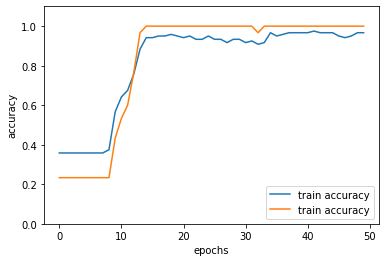

In [8]:
print("hidden size: ",hidden_size)
print("epochs: ",epochs)
print("batch size: ",batch_size)
x = np.arange(len(tn2.train_accuracylist))
plt.plot(x, tn2.train_accuracylist, label='train accuracy')
plt.plot(x, tn2.test_accuracylist, label='train accuracy')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.1)
plt.legend(loc='lower right')
plt.show()

hidden size:  10
epochs:  50
batch size:  20


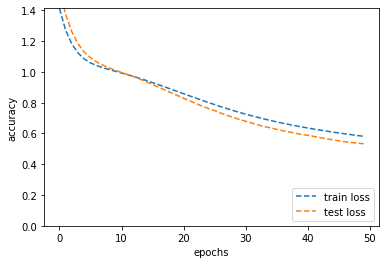

In [9]:
print("hidden size: ",hidden_size)
print("epochs: ",epochs)
print("batch size: ",batch_size)

maxloss = max(tn2.train_losslist)
x = np.arange(len(tn2.train_losslist))
plt.plot(x, tn2.train_losslist, label='train loss' ,linestyle='--')
plt.plot(x, tn2.test_losslist, label='test loss' ,linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, maxloss)
plt.legend(loc='lower right')
plt.show()